# K-Means ++
- This notebook contains the code to implement the K-means algorithm from scratch using `Lloyd's Algorithm`
- K-Means is an `Unsupervised Learning` algorithm
- K-means is a `Clustering` algorithm
- This implementation will initialize the centroids in a smarter way, thereby overcoming the drawbacks of random initialization
- Also, we will evaluate the model using `Silhouette Analysis`

## Importing Libraries

In [1]:
# data manipulation
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt

# dataset
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# pre=processing
from sklearn.preprocessing import StandardScaler

# metrics
from sklearn.metrics import silhouette_samples, silhouette_score

## Custom Class

In [3]:
class KMeans:

  def __init__(self,
               n_clusters=5,
               n_iter=100,
               tol=1e-4,
               random_state=None):
    """
    Parameters:
    -----------

    n_clusters: int
                Number of clusters to find in the dataset

    n_iter: int
            Max. no. of iterations to run the algorithm

    tol: float
         To check for convergence of the algorithm

    random_state: int
                  To control randomness and reproducibility of results across multiple runs
    """
    self.n_clusters = n_clusters
    self.n_iter = n_iter
    self.tol = tol
    self.random_state = random_state


  def _euclidean_distance(self, a, b):
    return np.sqrt(np.sum((a - b) ** 2))


  def _initalize_centroids(self, X):
    # k-means ++
    centroids = np.empty((self.n_clusters, self.n_features_in_))

    # initializing the first centroid
    index = np.random.randint(X.shape[0])
    centroids[0] = X[index]
    initialized = 1

    # initializing the other centroids
    for c in range(1, self.n_clusters):
      curr_centroids = centroids[:initialized, :]
      distances = np.array([
          np.min([self._euclidean_distance(x, centroid)
                  for centroid in curr_centroids])
          for x in X
      ])
      norm_distances = distances / np.sum(distances)
      cumsum_distances = np.cumsum(norm_distances)
      value = np.random.rand()
      index = np.argmax(value <= cumsum_distances)
      centroids[c] = X[index]
      initialized += 1

    return centroids


  def _display_training(self):
    plt.figure(figsize=(6, 4))
    plt.plot(range(1, len(self.inertias_) + 1),
             self.inertias_,
             linewidth=2)
    plt.xlabel("No. of Iterations")
    plt.ylabel("Inertia")
    plt.title("Lloyd's Algorithm")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


  def fit(self, X, y=None):
    """
    This method will train a K-Means model
    """
    n = X.shape[0]
    self.inertias_ = []
    self.n_features_in_ = X.shape[1]
    self.centroids_ = self._initalize_centroids(X)
    self.labels_ = None
    self.inertia_ = np.inf

    for i in range(self.n_iter):
      inertia = 0
      # assigning clusters
      labels = np.empty(n, dtype=int)
      for j, x in enumerate(X):
        distances = [self._euclidean_distance(x, centroid)
                     for centroid in self.centroids_]
        index = np.argmin(distances)
        labels[j] = index
        distance = distances[index]
        inertia += distance
      inertia /= n

      # checking convergence
      if np.abs(self.inertia_ - inertia) <= self.tol:
        print(f"> The algorithm converged in {i + 1} iterations")
        self.labels_ = labels
        break
      self.labels_ = labels
      self.inertia_ = inertia
      self.inertias_.append(inertia)

      # updating centroids
      for label in np.unique(self.labels_):
        subset = X[self.labels_ == label]
        self.centroids_[label] = np.mean(subset, axis=0)

    if i == self.n_iter - 1:
      print(f"> The algorithm ran all {self.n_iter} iterations")
    print("> Successfully trained the K-Means model\n")

    return self


  def transform(self, X):
    result = np.array([
        [self._euclidean_distance(x, centroid) for centroid in self.centroids_]
        for x in X
    ])
    return result


  def predict(self, X):
    return np.argmin(self.transform(X), axis=1)

## Getting the Data

In [4]:
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1.0,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)

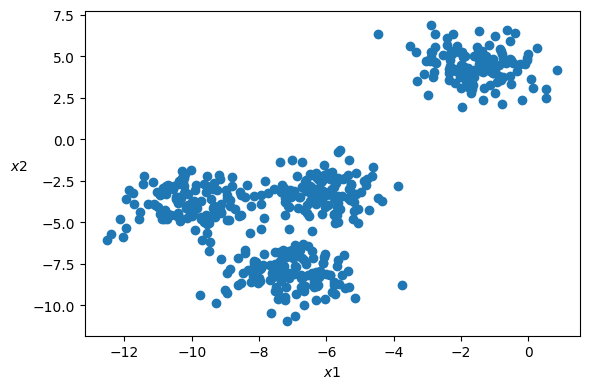

In [5]:
plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel("$x1$")
plt.ylabel("$x2$", rotation=0, labelpad=10)
plt.tight_layout()
plt.show()

## Scaling the Data

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Training the Model

In [7]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_scaled)

> The algorithm converged in 4 iterations
> Successfully trained the K-Means model



In [8]:
kmeans.centroids_

array([[-1.20371678, -0.25345176],
       [ 1.45785578,  1.53881252],
       [ 0.0328524 , -0.1120338 ],
       [-0.27709885, -1.17219561]])

In [9]:
kmeans.inertia_

0.31618292210312104

In [10]:
kmeans.inertias_

[0.43732376631776887, 0.31667692973495953, 0.31618292210312104]

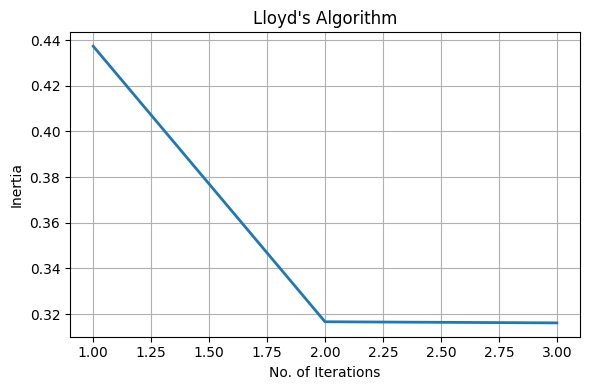

In [11]:
kmeans._display_training()

In [12]:
kmeans.transform(X_scaled)

array([[1.77415954, 3.67938618, 1.64153478, 0.56342208],
       [0.84210744, 3.34673394, 1.16636555, 0.52309804],
       [0.27589038, 2.96662123, 1.10903936, 1.40677547],
       ...,
       [0.97694935, 3.56539478, 1.38462348, 0.5848732 ],
       [1.1046013 , 3.23439118, 1.07396816, 0.20828345],
       [1.14200229, 2.20558133, 0.13509375, 1.14843639]])

## Evaluating the Model

### Silhouette Analysis

> The algorithm converged in 7 iterations
> Successfully trained the K-Means model

> The algorithm converged in 5 iterations
> Successfully trained the K-Means model

> The algorithm converged in 5 iterations
> Successfully trained the K-Means model

> The algorithm converged in 7 iterations
> Successfully trained the K-Means model

> The algorithm converged in 11 iterations
> Successfully trained the K-Means model



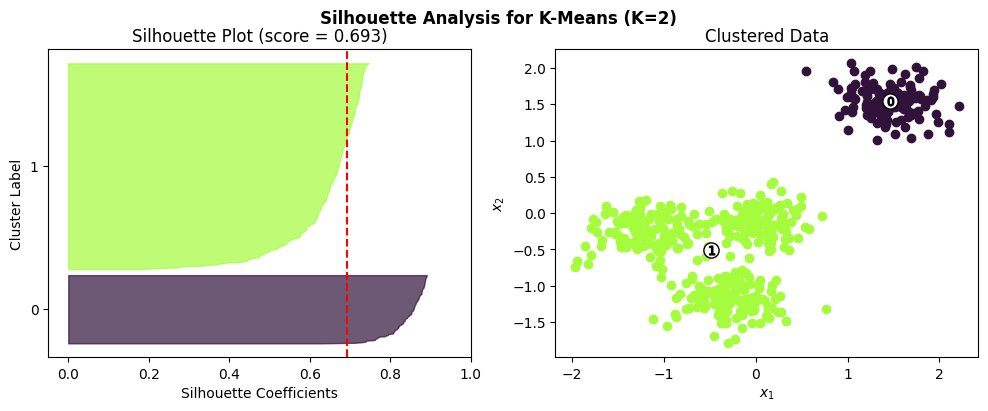

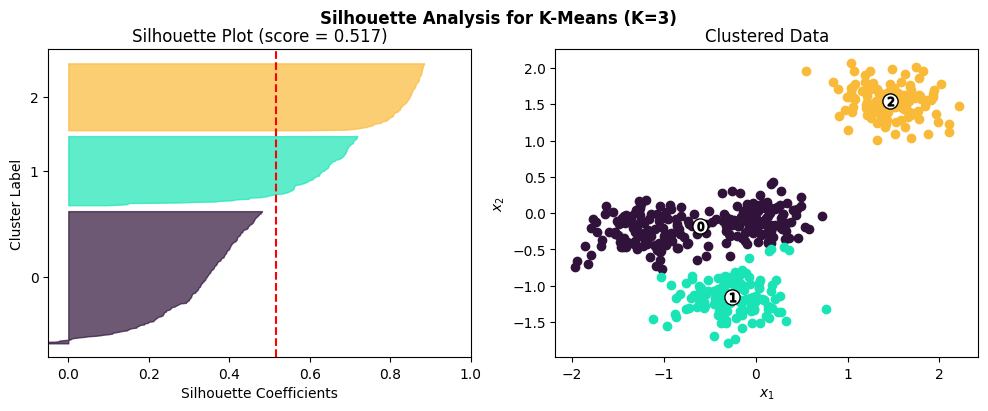

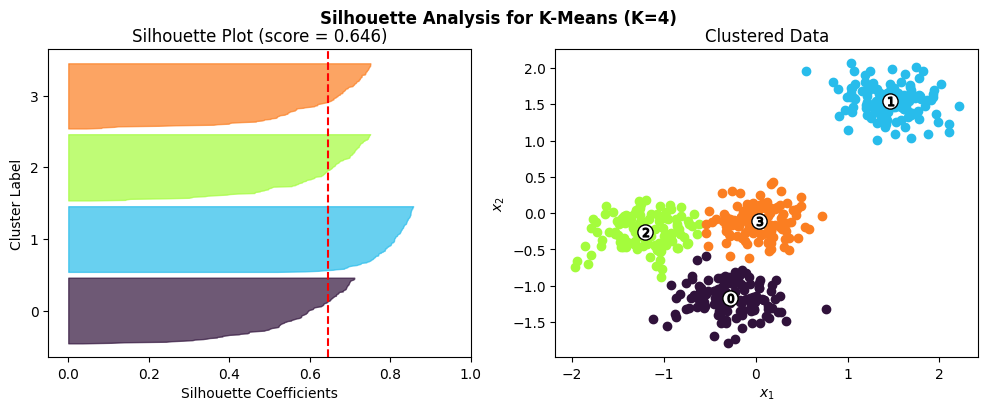

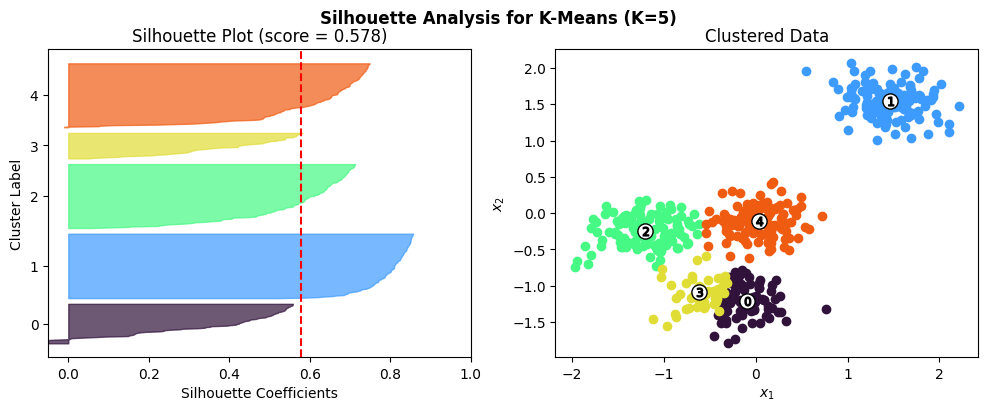

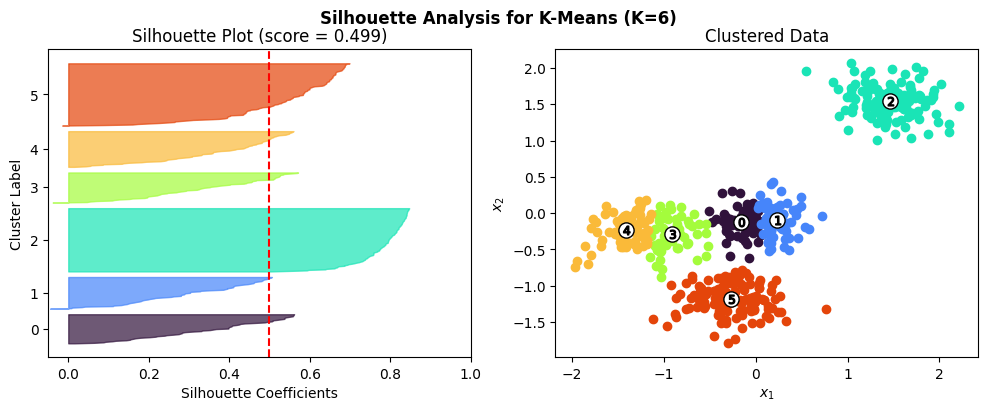

In [21]:
for k in range(2, 7):
  kmeans = KMeans(n_clusters=k,
                  random_state=7)
  kmeans.fit(X_scaled)
  labels = kmeans.labels_
  sil_score = silhouette_score(X_scaled, labels)
  sil_coefficients = silhouette_samples(X_scaled, labels)

  cmap = plt.get_cmap("turbo")
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

  # 1st axes
  yticks = []
  y_lower = 5
  for cluster in range(k):
    color = cmap(cluster / k)
    filter = (labels == cluster)
    cluster_size = filter.sum()
    coefficients = np.sort(sil_coefficients[filter])
    y_upper = y_lower + cluster_size
    ax1.fill_betweenx(range(y_lower, y_upper),
                      x1=0,
                      x2=coefficients,
                      color=color,
                      alpha=0.7)
    y_tick = int((y_lower + y_upper) / 2)
    yticks.append(y_tick)
    y_lower = y_upper + 10
  ax1.axvline(x=sil_score,
              color="red",
              linestyle="--")
  ax1.set(xlim=(-0.05, 1.0),
          xlabel="Silhouette Coefficients",
          yticks=yticks,
          yticklabels=range(k),
          ylabel="Cluster Label",
          title=f"Silhouette Plot (score = {sil_score:.3f})")

  # 2nd axes
  for cluster in range(k):
    color = cmap(cluster / k)
    filter = (labels == cluster)
    ax2.scatter(X_scaled[filter, 0],
                X_scaled[filter, 1],
                color=color,
                marker="o")

  for i, centroid in enumerate(kmeans.centroids_):
    ax2.scatter(centroid[0],
                centroid[1],
                color="white",
                marker="o",
                s=120,
                edgecolor="black")
    ax2.scatter(centroid[0],
                centroid[1],
                color="black",
                marker=f"${i}$",
                s=40)
  ax2.set(xlabel="$x_1$",
          ylabel="$x_2$",
          title="Clustered Data")

  fig.suptitle(f"Silhouette Analysis for K-Means (K={k})",
               fontweight="bold")
plt.show()

- The diagram displays the clustering results for various values of K
- The left side plot shows the `Silhouette PLot`
 - The vertical dashed line shows the overall `Silhouette Score`
 - The knife-like object represents the silhouette coefficients of the observations belonging to the particular clusters
- The right side plot shows the datapoints with their respective cluster labels
- Ideally we would like all the knife-like objects to extend beyond the vertical line and also be of equivalent lengths
- For K = 4:
 - The silhouette score is very high
 - All the knife-like objects extend beyond the vertical line
 - The clusters are all similar in size as well
- Therefore, for K = 4, the clustering results are better compared to the others